# Prettiest Neighborhood in Pittsburgh
### Introduction:
We are looking for the prettiest neighborhood in Pittsburgh by using the number of public art, water features, and greenways. We came up with this by looking at by going through the website and seeing multiple datasets that relate to it. Our alternative was easiest neighborhood to rob someone in and get away with it.
### Metric:
Our metric is the standardized prettiness scale, which is created by using the percentage of public art, decorative water features, and greenways and then averaging the result. The higher the number the prettier the neighborhood.

In [15]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Part 1: Public Art
Public art is a great way to measure how appealing a neighborhood is to look at as they provide something nice to contrast a bunch of boring buildings.

![public_art](public_art.jpg)

In [17]:
#counts
data_art = pd.read_csv("public_art.csv", sep=',')
data_art.dropna()

neighborhoods_art = data_art['neighborhood']
count_art = {}
#adding all the neighborhoods to the array
for name in neighborhoods_art:
    if name in count_art:
        count_art[name] = count_art.get(name) + 1
    else:
        count_art[name] = 1

print("How much public art does each neighborhood have? (Neighborhood: Count)")
print()

#printing the neighborhood and number of public art
keys_art = list(count_art.keys())
values_art = list(count_art.values())
sorted_value_index_art = np.argsort(values_art)[::-1]
sorted_dict_art = {keys_art[i]: values_art[i] for i in sorted_value_index_art}
for x, y in sorted_dict_art.items():
    print(x, ":", y)

How much public art does each neighborhood have? (Neighborhood: Count)

Central Business District : 27
Squirrel Hill South : 20
Allegheny Center : 18
Highland Park : 10
South Side Flats : 9
North Shore : 8
Beechview : 7
Shadyside : 6
Lower Lawrenceville : 5
Brighton Heights : 5
Central Oakland : 5
Spring Hill-City View : 4
South Side Slopes : 3
Duquesne Heights : 3
Elliott : 3
Greenfield : 3
Crawford-Roberts : 3
Point Breeze : 3
Hazelwood : 3
Beltzhoover : 3
East Allegheny : 2
Strip District : 2
Mount Washington : 2
Squirrel Hill North : 2
West End : 2
Lincoln-Lemington-Belmar : 2
Upper Hill : 2
Garfield : 2
Central Lawrenceville : 2
Allentown : 2
Perry North : 2
nan : 2
Spring Garden : 2
Brookline : 2
Carrick : 2
Manchester : 1
Allegheny West : 1
Hays : 1
Overbrook : 1
Esplen : 1
Crafton Heights : 1
Troy Hill : 1
Swisshelm Park : 1
Sheraden : 1
Regent Square : 1
Polish Hill : 1
East Hills : 1
North Oakland : 1
East Carnegie : 1
Bloomfield : 1
East Liberty : 1
Stanton Heights : 1
Upper

### Visualizing the Data:

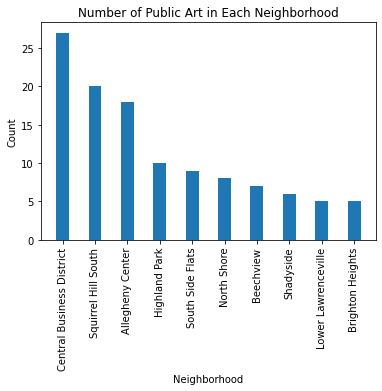

In [37]:
import matplotlib.pyplot as plt

names_art = list(sorted_dict_art.keys())[0:10]
values_art = list(sorted_dict_art.values())[0:10]

plt.bar(range(len(names_art)), values_art, width = 0.4, tick_label=names_art)
plt.xlabel("Neighborhood")
plt.ylabel("Count")
plt.title("Number of Public Art in Each Neighborhood")
plt.xticks(rotation = 90)
plt.show()

### Standardizing the Data:

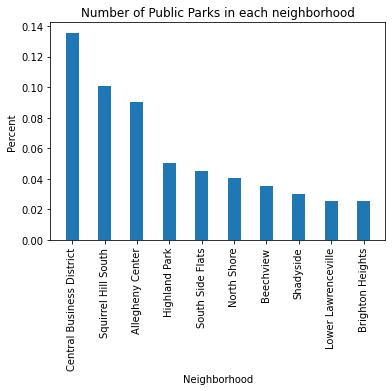

In [20]:
total_art = data_art['neighborhood'].size
for i in range(len(values_art)):
    values_art[i] = values_art[i] / total_art

plt.bar(range(len(names_art)), values_art, width = 0.4, tick_label=names_art)
plt.xlabel("Neighborhood")
plt.ylabel("Percent")
plt.title("Number of Public Parks in each neighborhood")
plt.xticks(rotation = 90)
plt.show()

# Part 2:
## Prettiest Water Features of Pittsburgh Neighborhoods
Metric that measures the total number of water features and weighs it based on the number of decorative water features to give a final value. Only neighborhood with decorative water features are give values.

![highland_park](highland_park.jpg)

### Number of water features at each neighborhood:

In [23]:
#count
data_water = pd.read_csv("water_features.csv", sep=',')
data_water.dropna()
data_water.head()

neighborhoods_water = data_water['neighborhood']
count_water = {}
#adding all the neighborhoods to the array
for name in neighborhoods_water:
    if name in count_water:
        count_water[name] = count_water.get(name) + 1
    else:
        count_water[name] = 1

#printing the neighborhood and number of water features
keys_water = list(count_water.keys())
values_water = list(count_water.values())
sorted_value_index_water = np.argsort(values_water)[::-1]
sorted_dict_water = {keys_water[i]: values_water[i] for i in sorted_value_index_water}
for x, y in sorted_dict_water.items():
    print(x, ":", y)

Squirrel Hill South : 14
Highland Park : 12
Allegheny Center : 8
Bloomfield : 8
Terrace Village : 8
Brookline : 8
Perry North : 7
Point Breeze : 7
East Liberty : 6
Elliott : 6
Carrick : 6
Spring Hill-City View : 6
Mount Washington : 6
Troy Hill : 6
Brighton Heights : 6
South Side Flats : 5
Shadyside : 5
Morningside : 5
Beechview : 5
Central Business District : 4
Garfield : 4
Regent Square : 3
Bedford Dwellings : 3
Lincoln-Lemington-Belmar : 3
Polish Hill : 3
South Oakland : 3
Greenfield : 3
Perry South : 3
Banksville : 3
Hazelwood : 3
North Oakland : 3
Crawford-Roberts : 3
Beltzhoover : 3
Sheraden : 3
Lincoln Place : 3
Manchester : 3
Larimer : 2
West End : 2
Windgap : 2
Westwood : 2
Central Oakland : 2
Duquesne Heights : 2
Upper Hill : 2
South Side Slopes : 2
Marshall-Shadeland : 2
Swisshelm Park : 2
Squirrel Hill North : 2
Allentown : 2
Hays : 2
Central Lawrenceville : 2
Point Breeze North : 2
Homewood South : 1
Middle Hill : 1
Bon Air : 1
Oakwood : 1
Bluff : 1
Homewood West : 1
Strip

### Visualizing the Data:

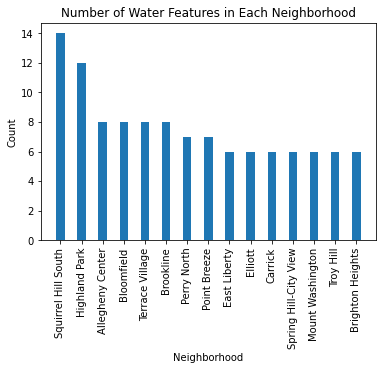

In [24]:
names_water = list(sorted_dict_water.keys())[0:15]
values_water = list(sorted_dict_water.values())[0:15]

plt.bar(range(len(names_water)), values_water, width = 0.4, tick_label=names_water)
plt.xlabel("Neighborhood")
plt.ylabel("Count")
plt.title("Number of Water Features in Each Neighborhood")
plt.xticks(rotation = 90)
plt.show()

### Narrowing down to only neighborhood with decorative water features:

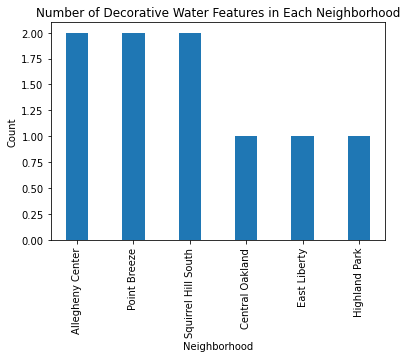

In [26]:
data_water = data_water[~data_water['name'].str.isnumeric()]
decorative_counts_water = data_water[data_water['feature_type'] == 'Decorative'].groupby('neighborhood').size()
sorted_dict_water = dict(sorted(decorative_counts_water.items(), key=lambda item: item[1], reverse=True))

names_water = list(sorted_dict_water.keys())[0:15]
values_water = list(sorted_dict_water.values())[0:15]

plt.bar(range(len(names_water)), values_water, width = 0.4, tick_label=names_water)
plt.xlabel("Neighborhood")
plt.ylabel("Count")
plt.title("Number of Decorative Water Features in Each Neighborhood")
plt.xticks(rotation = 90)

plt.show()

### Standardizing the Data:

In [29]:
data_water = data_water[~data_water['name'].str.isnumeric()]
neighborhood_counts_water = data_water.groupby('neighborhood').size()
decorative_counts_water = data_water[data_water['feature_type'] == 'Decorative'].groupby('neighborhood').size()
sorted_neighborhoods_water = sorted(decorative_counts_water.items(), key=lambda item: neighborhood_counts_water[item[0]] * (0.1 * item[1] + 1), reverse=True)

for neighborhood, count in sorted_neighborhoods_water:
    total_count = neighborhood_counts_water[neighborhood]
    product = total_count * ((0.1 * count) + 1)
    print(f'{neighborhood}: {count} decorative water features ({total_count} total water features) -> {round(product, 1)}')

Squirrel Hill South: 2 decorative water features (14 total water features) -> 16.8
Highland Park: 1 decorative water features (12 total water features) -> 13.2
Allegheny Center: 2 decorative water features (8 total water features) -> 9.6
East Liberty: 1 decorative water features (6 total water features) -> 6.6
Point Breeze: 2 decorative water features (5 total water features) -> 6.0
Central Oakland: 1 decorative water features (2 total water features) -> 2.2


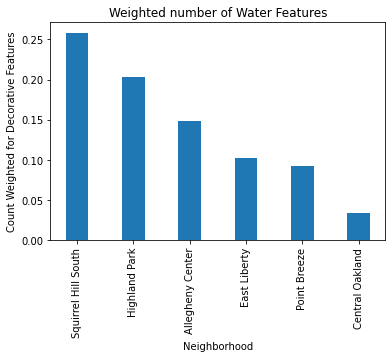

In [32]:
products = []
for neighborhood, count in decorative_counts_water.items():
    total_count = neighborhood_counts_water[neighborhood]
    product = total_count * ((0.1 * count)+1)
    unique_neighborhoods = data_water['neighborhood'].nunique()
    product/=unique_neighborhoods
    products.append(product)

data_products_water = pd.DataFrame({
    'Neighborhood': decorative_counts_water.index,
    'Decorative Count': decorative_counts_water.values,
    'Total Count': neighborhood_counts_water[decorative_counts_water.index].values,
    'Product': products
})

data_products_water = data_products_water.sort_values('Product', ascending=False)
data_top15 = data_products_water.head(15)

plt.bar(range(len(data_top15)), data_top15['Product'], width = 0.4, tick_label=data_top15['Neighborhood'])
plt.xlabel("Neighborhood")
plt.ylabel("Count Weighted for Decorative Features")
plt.title("Weighted number of Water Features")
plt.xticks(rotation = 90)
plt.show()

## Part 3: Greenways
a strip of undeveloped land near an urban area, set aside for recreational use or environmental protection.

![greenway](greenway.jpg)

In [4]:
#count
data_green = pd.read_csv("greenways.csv", sep=',')

data_green.head()

neighborhoods_green = data_green['name']
count_green = {}
#adding all the neighborhoods to the array
for name in neighborhoods_green:
    if name in count_green:
        count_green[name] = count_green.get(name) + 1
    else:
        count_green[name] = 1

#printing the neighborhood and number of public parks
keys_green = list(count_green.keys())
values_green = list(count_green.values())
sorted_value_index_green = np.argsort(values_green)[::-1]
sorted_dict_green = {keys_green[i]: values_green[i] for i in sorted_value_index_green}
for x, y in sorted_dict_green.items():
    print(x, ":", y)

Hazelwood : 1
Spring Hill Spring Garden : 1
Oakcliffe : 1
Allegheny River : 1
Observatory Hill Hollows : 1
Bigelow : 1
Perry South : 1
Nine Mile Run : 1
Moore : 1
Beechview Seldom Seen : 1


### Visualizing the Data:

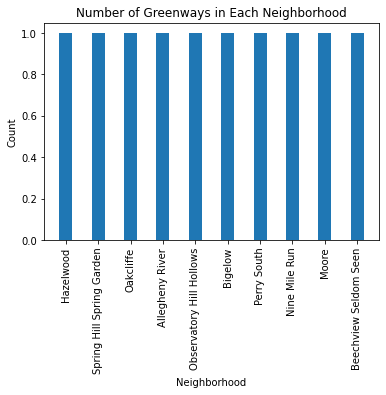

In [6]:
names_green = list(sorted_dict_green.keys())[0:10]
values_green = list(sorted_dict_green.values())[0:10]

plt.bar(range(len(names_green)), values_green, width = 0.4, tick_label=names_green)
plt.xlabel("Neighborhood")
plt.ylabel("Count")
plt.title("Number of Greenways in Each Neighborhood")
plt.xticks(rotation = 90)
plt.show()

### Standardizing the Data:

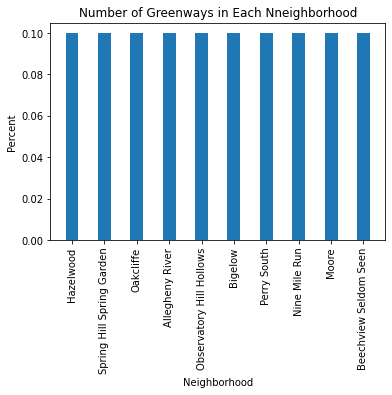

In [7]:
total_green = data_green['name'].size
for i in range(len(values_green)):
    values_green[i] = values_green[i] / total_green

plt.bar(range(len(names_green)), values_green, width = 0.4, tick_label=names_green)
plt.xlabel("Neighborhood")
plt.ylabel("Percent")
plt.title("Number of Greenways in Each Nneighborhood")
plt.xticks(rotation = 90)
plt.show()

## Part 4: Combining the Data

In [44]:
standardized = {}
#recalculating because we only have top 10
names_art = list(sorted_dict_art.keys())
values_art = list(sorted_dict_art.values())
total_art = data_art['neighborhood'].size
for i in range(len(values_art)):
    values_art[i] = values_art[i] / total_art

art = dict(zip(names_art, values_art))
water = dict(zip(data_top15['Neighborhood'], data_top15['Product']))
green = dict(zip(names_green, values_green))

standardized = {**art, **water, **green}
for key, value in standardized.items():
    if key in art and key in water and key in green:
        standardized[key] = art[key] + water[key] + green[key]
    elif key in art and key in water:
        standardized[key] = art[key] + water[key]
    elif key in art and key in green:
        standardized[key] = art[key] + green[key]
    elif key in water and key in green:
        standardized[key] = water[key] + green[key]
    standardized[key] = standardized[key] / 3

keys = list(standardized.keys())
values = list(standardized.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
for x, y in sorted_dict.items():
    print(x, ":", y)

Squirrel Hill South : 0.11965468367478417
Highland Park : 0.08444272645277671
Allegheny Center : 0.07938152299961344
Central Business District : 0.04522613065326633
Hazelwood : 0.03835845896147404
Point Breeze : 0.035794356397371475
East Liberty : 0.03552119572220075
Perry South : 0.03500837520938024
Moore : 0.03333333333333333
Beechview Seldom Seen : 0.03333333333333333
Spring Hill Spring Garden : 0.03333333333333333
Allegheny River : 0.03333333333333333
Nine Mile Run : 0.03333333333333333
Bigelow : 0.03333333333333333
Observatory Hill Hollows : 0.03333333333333333
Oakcliffe : 0.03333333333333333
Central Oakland : 0.01965726066228579
South Side Flats : 0.015075376884422112
North Shore : 0.01340033500837521
Beechview : 0.011725293132328308
Shadyside : 0.010050251256281407
Lower Lawrenceville : 0.008375209380234507
Brighton Heights : 0.008375209380234507
Spring Hill-City View : 0.006700167504187605
Duquesne Heights : 0.005025125628140704
Elliott : 0.005025125628140704
Greenfield : 0.005

### Visualizing the Data:

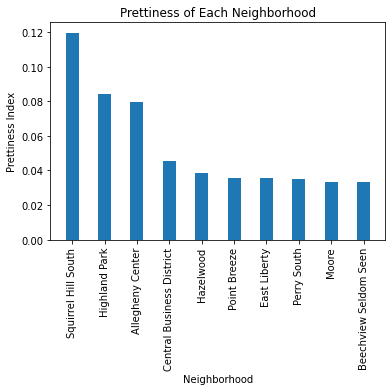

In [45]:
names = list(sorted_dict.keys())[0:10]
values = list(sorted_dict.values())[0:10]

plt.bar(range(len(names)), values, width = 0.4, tick_label=names)
plt.xlabel("Neighborhood")
plt.ylabel("Prettiness Index")
plt.title("Prettiness of Each Neighborhood")
plt.xticks(rotation = 90)
plt.show()

# Winner: Squirrel Hill South

# Conclusion:

### Max:
I believe that Squirrel Hill South is the best neighborhood in Pittsburgh. While visiting there I had experienced numerous pretty views and often found myself admiring the views and all of the other picturesque areas. In comparison to other Pittsburgh neighborhoods, I feel that Squirrel Hill South offers the most consistent and highest quality of prettiness. Using that metric I believe that Squirrel Hill South is the best neighborhood in Pittsburgh
### Brayden:
I believe that Shadyside is the best neighborhood in Pittsburgh. It reminds me the most of home and I think it is very visually appealing which is hard to measure a data metric for. Although I have not visited all of the neighborhoods, I like the appearance of Shadyside the most so far. Since it does not have the most amount of specific pretty things, so it makes sense it did not win based on our metrics.
### Will:
I believe Southside is the best neighborhood in Pittsburgh. There are a variety of options for both food and shopping. I have many memories of going thrifting for clothes with friends in the neighborhood. I would definitely vote Squirrel Hill a close second, especially because the cuisine there hits close to home, but I think that in general I've enjoyed the Southside more, due to the memories that I have from going there with other people.